In [ ]:
%load_ext autoreload
%autoreload 2
import pickle
import os, sys
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import squareform,pdist
from scipy.stats import zscore, norm, ttest_ind
from scipy.io import loadmat
from copy import deepcopy
root_path = os.path.realpath('../')
sys.path.append(root_path)

from utils import eval, choicemodel, plotting, data
from hebbcl.parameters import parser

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True


## Figure 1: Experiment design and baselines

In [ ]:
plotting.plot_basicstats(models=["baseline_interleaved_new_select", "baseline_blocked_new_select"])

In [ ]:
plotting.plot_mds(filename_embedding="mds_embedding_baseline_int_new",filename_runs= "baseline_interleaved_new_select", thetas=(40,0,10), layer="all_y_hidden", n_runs=50, resultsdir="../results/")


In [ ]:

plotting.plot_mds(filename_embedding="mds_embedding_baseline_blocked_new", filename_runs = "baseline_blocked_new_select", thetas=(-10,-10, -70), layer="all_y_hidden", n_runs=50, resultsdir="../results/")



## Figure 2: The cost of interleaving

In [ ]:
# choice matrix models

%matplotlib inline
_,_,cmats = eval.gen_behav_models()

f,ax = plt.subplots(2,2, figsize=(2,2),dpi=300)
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(np.flipud(cmats[i,j,:,:]))
        if j<1:
            ax[i,j].set(xlabel='rel',ylabel='irrel')
        else:
            ax[i,j].set(xlabel='irrel',ylabel='rel')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])


In [ ]:
# accuracy (sluggishness)
%matplotlib inline

plotting.plot_sluggish_results(filename="sluggish_baseline_int_select_sv")

## Figure 3: continual learning with manual gating

In [ ]:
plotting.plot_basicstats(models = "gated_blocked_new_select_cent")

In [ ]:
plotting.plot_mds(filename_embedding="mds_embedding_gated_blocked_new",filename_runs= "gated_blocked_new_select_cent", thetas=(-20,-20,-150), layer="all_y_hidden", n_runs=50, resultsdir="../results/")


## Figure 4: Hebbian learning of context weights 

In [ ]:
plotting.biplot_dataset(ds="blobs",ctx_scaling=6)

In [ ]:
plotting.plot_oja(n_hidden=1, ds="blobs")

In [ ]:
plotting.plot_oja(n_hidden=1, ds="trees")

In [ ]:
plotting.plot_basicstats(models = ["oja_blocked_new_select_halfcenter"])

In [ ]:
plotting.plot_mds(filename_embedding = "mds_embedding_oja_blocked_new_select_halfcenter", 
filename_runs="oja_blocked_new_select_halfcenter", thetas = (-25,305, 20))


## Figure 5: Modelling human learning with Oja + EMA

### HP Grid Search

Text(0, 0.5, 'mse')

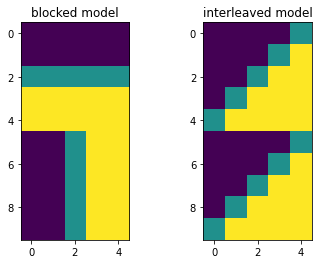

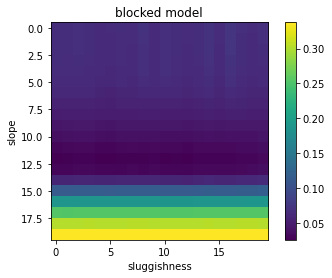

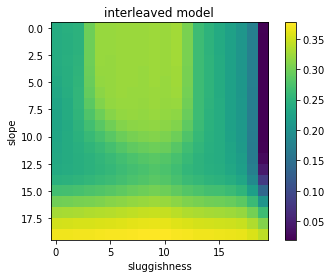

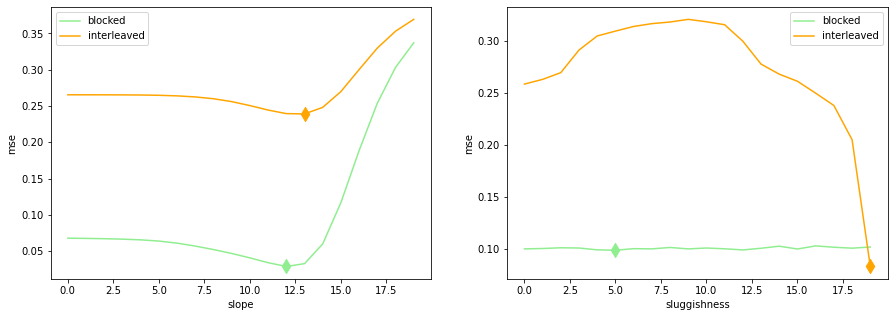

In [58]:
# model validation: fit to idealised choice matrices 
%matplotlib inline
_,_,mats = eval.gen_behav_models()
tmp_b = mats[0].ravel()[:,np.newaxis]
tmp_i = mats[1].ravel()[:,np.newaxis]
plt.subplot(1,2,1)
plt.imshow(tmp_b.reshape(10,5))
plt.title('blocked model')
plt.subplot(1,2,2)
plt.imshow(tmp_i.reshape(10,5))
plt.title('interleaved model')

mses_b = choicemodel.gridsearch_modelparams(tmp_b, curriculum="blocked")
plt.figure()
plt.imshow(np.fliplr(np.array(mses_b).reshape(20,20)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('blocked model')
plt.colorbar()
mses_i = choicemodel.gridsearch_modelparams(tmp_i, curriculum="interleaved")
plt.figure()
plt.imshow(np.fliplr(np.array(mses_i).reshape(20,20)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('interleaved model')
plt.colorbar()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.array(mses_b).reshape(20,20).mean(1),color='lightgreen',linestyle='-')
plt.plot(np.array(mses_i).reshape(20,20).mean(1),color='orange',linestyle='-')
plt.scatter(np.where(np.array(mses_b).reshape(20,20).mean(1)==np.min(np.array(mses_b).reshape(20,20).mean(1)))[0][0],np.min(np.array(mses_b).reshape(20,20).mean(1)),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(np.array(mses_i).reshape(20,20).mean(1)==np.min(np.array(mses_i).reshape(20,20).mean(1)))[0][0],np.min(np.array(mses_i).reshape(20,20).mean(1)),marker='d',s=100,color='orange')
plt.legend(('blocked','interleaved'))
plt.xlabel('slope')
plt.ylabel('mse')
plt.subplot(1,2,2)
plt.plot(np.flip(np.array(mses_b).reshape(20,20).mean(0)),color='lightgreen',linestyle='-')
plt.plot(np.flip(np.array(mses_i).reshape(20,20).mean(0)),color='orange',linestyle='-')
plt.scatter(np.where(np.flip(np.array(mses_b).reshape(20,20).mean(0))==np.min(np.flip(np.array(mses_b).reshape(20,20).mean(0))))[0][0],np.min(np.flip(np.array(mses_b).reshape(20,20).mean(0))),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(np.flip(np.array(mses_i).reshape(20,20).mean(0))==np.min(np.flip(np.array(mses_i).reshape(20,20).mean(0))))[0][0],np.min(np.flip(np.array(mses_i).reshape(20,20).mean(0))),marker='d',s=100,color='orange')
plt.legend(('blocked','interleaved'))
plt.xlabel('sluggishness')
plt.ylabel('mse')

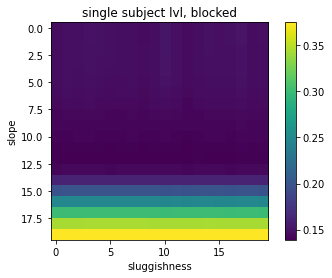

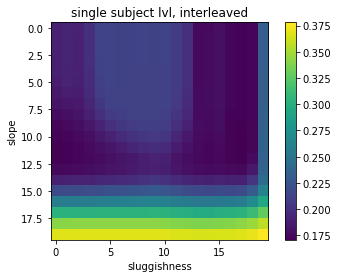

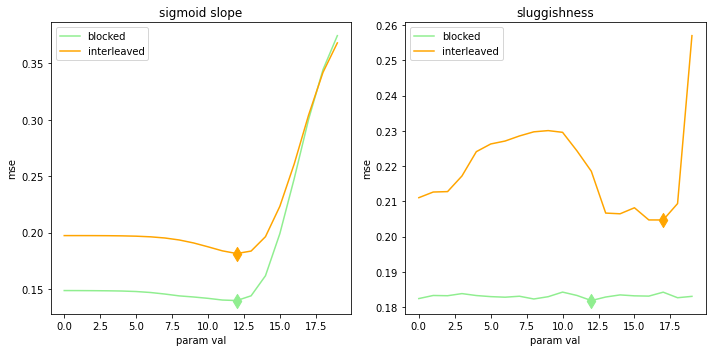

In [59]:
# grid search at single subject level
gs_results = choicemodel.wrapper_gridsearch_modelparams()
plt.figure()
plt.imshow(np.fliplr(gs_results['cmat_b'].reshape(-1,20,20).mean(0)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('single subject lvl, blocked')
plt.colorbar()

plt.figure()
plt.imshow(np.fliplr(gs_results['cmat_i'].reshape(-1,20,20).mean(0)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('single subject lvl, interleaved')
plt.colorbar()


# averages
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1),color='lightgreen',linestyle='-')
plt.plot(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1),color='orange',linestyle='-')
plt.scatter(np.where(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)==np.min(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)))[0][0],np.min(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)==np.min(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)))[0][0],np.min(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)),marker='d',s=100,color='orange')
plt.title('sigmoid slope')
plt.xlabel('param val')
plt.ylabel('mse')
plt.legend(('blocked','interleaved'))
plt.subplot(1,2,2)
plt.plot(np.flip(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0)),color='lightgreen',linestyle='-')
plt.plot(np.flip(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0)),color='orange',linestyle='-')
plt.scatter(np.where(np.flip(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))==np.min(np.flip(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))))[0][0],np.min(np.flip(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(np.flip(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))==np.min(np.flip(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))))[0][0],np.min(np.flip(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))),marker='d',s=100,color='orange')
plt.title('sluggishness')
plt.xlabel('param val')
plt.ylabel('mse')
plt.legend(('blocked','interleaved'))
plt.tight_layout()

In [60]:
print(f"estimated sluggishness (idx), interleaved: {np.argmin(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))}")
print(f"estimated sluggishness (idx), blocked: {np.argmin(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))}")
print(f"estimated slope (idx), interleaved: {np.argmin(gs_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1))}")
print(f"estimated slope (idx), blocked: {np.argmin(gs_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1))}")
# np.logspace(np.log(0.1), np.log(4), 20)[12]

estimated sluggishness (idx), interleaved: 2
estimated sluggishness (idx), blocked: 7
estimated slope (idx), interleaved: 12
estimated slope (idx), blocked: 12


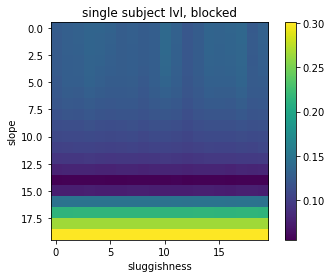

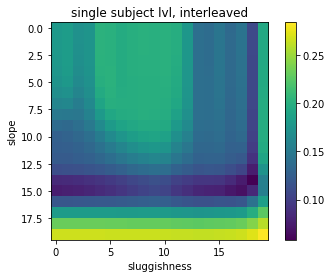

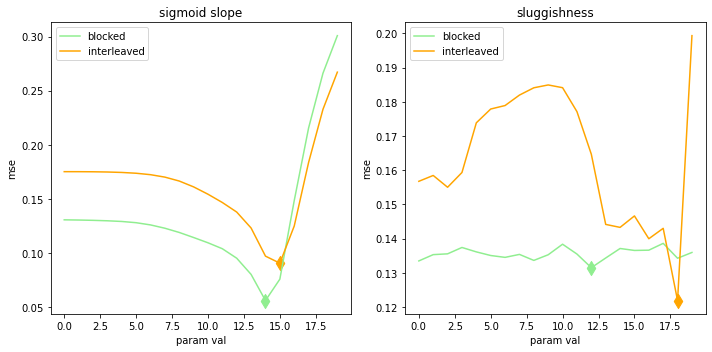

In [61]:
%matplotlib inline
# grid search at group level 
gs_m_results = choicemodel.wrapper_gridsearch_modelparams(single_subs=False)
plt.figure()
plt.imshow(np.fliplr(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('single subject lvl, blocked')
plt.colorbar()

plt.figure()
plt.imshow(np.fliplr(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0)))
plt.xlabel('sluggishness')
plt.ylabel('slope')
plt.title('single subject lvl, interleaved')
plt.colorbar()


# averages
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1),color='lightgreen',linestyle='-')
plt.plot(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1),color='orange',linestyle='-')
plt.scatter(np.where(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)==np.min(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)))[0][0],np.min(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(1)),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)==np.min(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)))[0][0],np.min(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(1)),marker='d',s=100,color='orange')
plt.title('sigmoid slope')
plt.xlabel('param val')
plt.ylabel('mse')
plt.legend(('blocked','interleaved'))
plt.subplot(1,2,2)
plt.plot(np.flip(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0)),color='lightgreen',linestyle='-')
plt.plot(np.flip(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0)),color='orange',linestyle='-')
plt.scatter(np.where(np.flip(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))==np.min(np.flip(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))))[0][0],np.min(np.flip(gs_m_results['cmat_b'].reshape(-1,20,20).mean(0).mean(0))),marker='d',s=100,color='lightgreen')
plt.scatter(np.where(np.flip(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))==np.min(np.flip(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))))[0][0],np.min(np.flip(gs_m_results['cmat_i'].reshape(-1,20,20).mean(0).mean(0))),marker='d',s=100,color='orange')
plt.title('sluggishness')
plt.xlabel('param val')
plt.ylabel('mse')
plt.legend(('blocked','interleaved'))
plt.tight_layout()

In [62]:
print(f"estimated sluggishness (idx), interleaved: {np.argmin(gs_m_results['cmat_i'].reshape(20,20).mean(0))}")
print(f"estimated sluggishness (idx), blocked: {np.argmin(gs_m_results['cmat_b'].reshape(20,20).mean(0))}")
print(f"estimated slope (idx), interleaved: {np.argmin(gs_m_results['cmat_i'].reshape(20,20).mean(1))}")
print(f"estimated slope (idx), blocked: {np.argmin(gs_m_results['cmat_b'].reshape(20,20).mean(1))}")

estimated sluggishness (idx), interleaved: 1
estimated sluggishness (idx), blocked: 7
estimated slope (idx), interleaved: 15
estimated slope (idx), blocked: 14


### Accuracy

accuracy blocked: 0.64


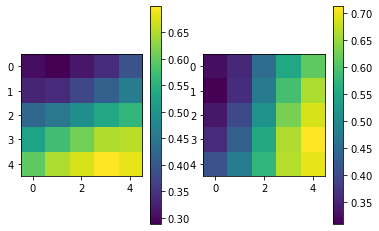

In [64]:
n_runs = 20
idx = 1
tempval_interleaved = 12
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/sluggish_oja_int_select_sv"
        + str(idx)
        + "/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_interleaved)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_a = np.array(cmats_a).mean(0)
cmats_b = np.array(cmats_b).mean(0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(cmats_a)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(cmats_b)
plt.colorbar()
acc_est = choicemodel.compute_sampled_accuracy(cmats_a, cmats_b)
print(f"accuracy blocked: {acc_est:.2f}")


acc humans blocked vs interleaved: t=2.32, p=0.0223
acc baseline blocked vs interleaved: t=-153.37, p=0.0000
acc oja blocked vs interleaved: t=13.37, p=0.0000


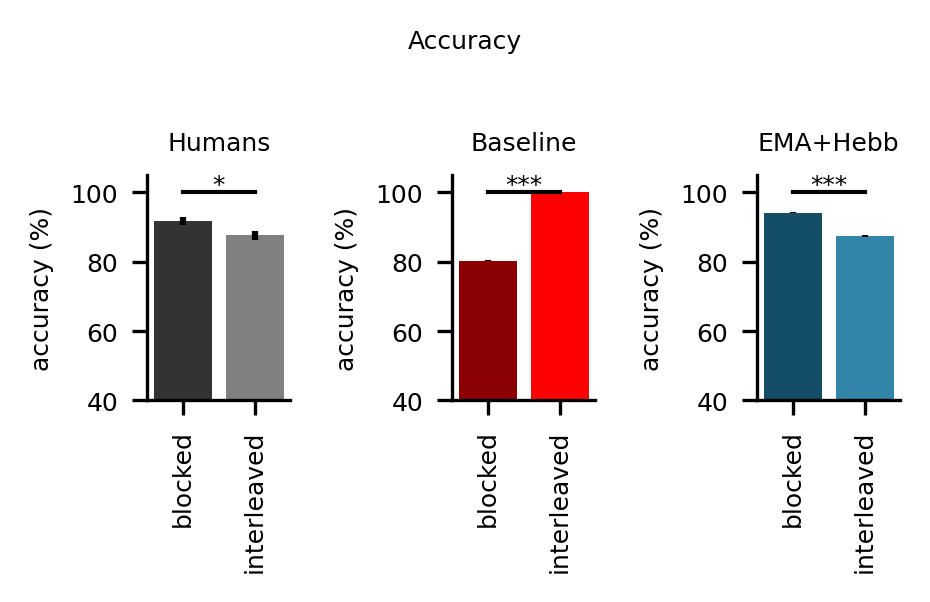

In [69]:
plotting.plot_modelcomparison_accuracy()

### Sigmoids

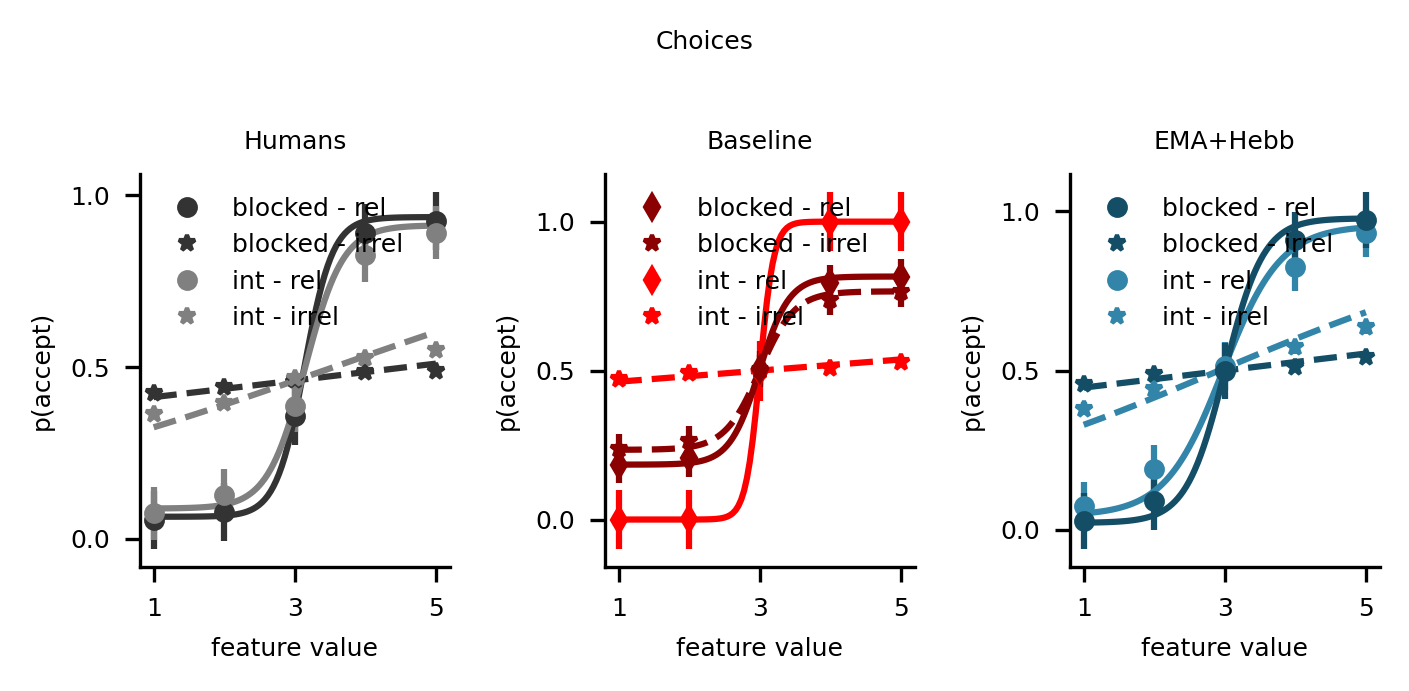

In [50]:

# sigmoids
sluggish_vals = np.round(np.linspace(0.05, 1, 20), 2)
# best fitting with baseline_int slug models:
# alpha = 0.25
# idx = np.where(alpha == sluggish_vals)[0][0]
# tempidx_blocked = 13
# tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
# tempidx_interleaved = 16
# tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
# n_runs = 50


# best fitting with oja slug models:
alpha = 0.1
idx = np.where(sluggish_vals==alpha)[0][0]
tempidx_blocked = 14
tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
tempidx_interleaved = 14
tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
n_runs = 20

plt.figure(figsize=(4.8, 2.3), dpi=300)

betas = {
    "humans": {"blocked": {"rel": [], "irrel": []}, "int": {"rel": [], "irrel": []}},
    "baseline": {"blocked": {"rel": [], "irrel": []}, "int": {"rel": [], "irrel": []}},
    "ema": {"blocked": {"rel": [], "irrel": []}, "int": {"rel": [], "irrel": []}},
}

choices = loadmat("../datasets/choices_exp1a.mat")
# fit betas to individual subjects
for k, v in choices.items():
    if "choices" in k:
        k = k.split("_")
        bs = []
        for y in v:
            bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
        if k[1] == "b200":
            betas["humans"]["blocked"][k[-1]] = np.asarray(bs)
        else:
            betas["humans"][k[1]][k[-1]] = np.asarray(bs)

plt.subplot(1, 3, 1)
choices = loadmat("../datasets/choices_exp1a.mat")
pl_bl_rel = plt.errorbar(
    np.arange(5),
    choices["choices_b200_rel"].mean(0),
    yerr=np.std(choices["choices_b200_rel"].mean(0)) / np.sqrt(n_runs),
    marker="o",
    color=(0.2, 0.2, 0.2),
    markersize=4,
    linestyle="",
)
pl_bl_irrel = plt.errorbar(
    np.arange(5),
    choices["choices_b200_irrel"].mean(0),
    yerr=np.std(choices["choices_b200_irrel"].mean(0)) / np.sqrt(n_runs),
    marker="*",
    color=(0.2, 0.2, 0.2),
    linestyle="",
    markersize=4,
)
f_bl_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices["choices_b200_rel"].mean(0))
    ),
    color=(0.2, 0.2, 0.2),
    linestyle="-",
)
f_bl_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices["choices_b200_irrel"].mean(0))
    ),
    color=(0.2, 0.2, 0.2),
    linestyle="--",
)

pl_in_rel = plt.errorbar(
    np.arange(5),
    choices["choices_int_rel"].mean(0),
    yerr=np.std(choices["choices_int_rel"].mean(0)) / np.sqrt(n_runs),
    marker="o",
    color=(0.5, 0.5, 0.5),
    markersize=4,
    linestyle="",
)
pl_in_irrel = plt.errorbar(
    np.arange(5),
    choices["choices_int_irrel"].mean(0),
    yerr=np.std(choices["choices_int_irrel"].mean(0)) / np.sqrt(n_runs),
    marker="*",
    color=(0.5, 0.5, 0.5),
    linestyle="",
    markersize=4,
)
f_bl_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices["choices_int_rel"].mean(0))
    ),
    color=(0.5, 0.5, 0.5),
    linestyle="-",
)
f_bl_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices["choices_int_irrel"].mean(0))
    ),
    color=(0.5, 0.5, 0.5),
    linestyle="--",
)

sns.despine()
plt.legend(
    [pl_bl_rel[0], pl_bl_irrel[0], pl_in_rel[0], pl_in_irrel[0]],
    ["blocked - rel", "blocked - irrel", "int - rel", "int - irrel"],
    frameon=False,
    fontsize=6,loc=2
)
plt.title("Humans", fontsize=6)
plt.xlabel("feature value", fontsize=6)
plt.ylabel("p(accept)", fontsize=6)
plt.xticks(ticks=[0, 2, 4], labels=[1, 3, 5], fontsize=6)
plt.yticks(ticks=(0, 0.5, 1), fontsize=6)


plt.subplot(1, 3, 2)
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/baseline_interleaved_new_select/run_" + str(r) + "/results.pkl", "rb"
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        # choices = choice_sigmoid(cc,T=tempval)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
choices_rel = (cmats_a.mean(2) + cmats_b.mean(1)) / 2
choices_irrel = (cmats_a.mean(1) + cmats_b.mean(2)) / 2
bs = []
for y in choices_rel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["baseline"]["int"]["rel"] = np.asarray(bs)
bs = []
for y in choices_irrel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["baseline"]["int"]["irrel"] = np.asarray(bs)

pl_in_rel = plt.errorbar(
    np.arange(5),
    choices_rel.mean(0),
    yerr=np.std(choices_rel.mean(0)) / np.sqrt(n_runs),
    marker="d",
    color="red",
    markersize=4,
    linestyle="",
)
pl_in_irrel = plt.errorbar(
    np.arange(5),
    choices_irrel.mean(0),
    yerr=np.std(choices_irrel.mean(0)) / np.sqrt(n_runs),
    marker="*",
    color="red",
    linestyle="",
    markersize=4,
)
f_bl_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_rel.mean(0))
    ),
    color="red",
    linestyle="-",
)
f_bl_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_irrel.mean(0))
    ),
    color="red",
    linestyle="--",
)
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/baseline_blocked_new_select/run_" + str(r) + "/results.pkl", "rb"
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        # choices = choice_sigmoid(cc,T=tempval)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
choices_rel = (cmats_a.mean(2) + cmats_b.mean(1)) / 2
choices_irrel = (cmats_a.mean(1) + cmats_b.mean(2)) / 2
bs = []
for y in choices_rel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["baseline"]["blocked"]["rel"] = np.asarray(bs)
bs = []
for y in choices_irrel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["baseline"]["blocked"]["irrel"] = np.asarray(bs)

pl_bl_rel = plt.errorbar(
    np.arange(5),
    choices_rel.mean(0),
    yerr=np.std(choices_rel.mean(0)) / np.sqrt(n_runs),
    marker="d",
    color="darkred",
    markersize=4,
    linestyle="",
)
pl_bl_irrel = plt.errorbar(
    np.arange(5),
    choices_irrel.mean(0),
    yerr=np.std(choices_irrel.mean(0)) / np.sqrt(n_runs),
    marker="*",
    color="darkred",
    linestyle="",
    markersize=4,
)
f_bl_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_rel.mean(0))
    ),
    color="darkred",
    linestyle="-",
)
f_bl_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_irrel.mean(0))
    ),
    color="darkred",
    linestyle="--",
)
plt.legend(
    [pl_bl_rel[0], pl_bl_irrel[0], pl_in_rel[0], pl_in_irrel[0]],
    ["blocked - rel", "blocked - irrel", "int - rel", "int - irrel"],
    frameon=False,
    fontsize=6,loc=2
)
plt.title("Baseline", fontsize=6)
plt.xlabel("feature value", fontsize=6)
plt.ylabel("p(accept)", fontsize=6)
plt.xticks(ticks=[0, 2, 4], labels=[1, 3, 5], fontsize=6)
plt.yticks(ticks=(0, 0.5, 1), fontsize=6)


plt.subplot(1, 3, 3)
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/sluggish_oja_int_select_sv"
        + str(idx)
        + "/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_interleaved)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
choices_rel = (cmats_a.mean(2) + cmats_b.mean(1)) / 2
choices_irrel = (cmats_a.mean(1) + cmats_b.mean(2)) / 2

for y in choices_rel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["ema"]["int"]["rel"] = np.asarray(bs)
bs = []
for y in choices_irrel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["ema"]["int"]["irrel"] = np.asarray(bs)


pl_in_rel = plt.errorbar(
    np.arange(5),
    choices_rel.mean(0),
    yerr=np.std(choices_rel.mean(0)) / np.sqrt(n_runs),
    marker="o",
    color=[50 / 255, 133 / 255, 168 / 255],
    markersize=4,
    linestyle="",
)
pl_in_irrel = plt.errorbar(
    np.arange(5),
    choices_irrel.mean(0),
    yerr=np.std(choices_irrel.mean(0)) / np.sqrt(n_runs),
    marker="*",
    color=[50 / 255, 133 / 255, 168 / 255],
    linestyle="",
    markersize=4,
)
f_in_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_rel.mean(0))
    ),
    color=[50 / 255, 133 / 255, 168 / 255],
    linestyle="-",
)
f_in_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_irrel.mean(0))
    ),
    color=[50 / 255, 133 / 255, 168 / 255],
    linestyle="--",
)
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/oja_blocked_new_select_halfcenter/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_blocked)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_a = np.array(cmats_a)
cmats_b = np.array(cmats_b)
choices_rel = (cmats_a.mean(2) + cmats_b.mean(1)) / 2
choices_irrel = (cmats_a.mean(1) + cmats_b.mean(2)) / 2
for y in choices_rel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["ema"]["blocked"]["rel"] = np.asarray(bs)
bs = []
for y in choices_irrel:
    bs.append(choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), y, fitlapse=False))
betas["ema"]["blocked"]["irrel"] = np.asarray(bs)
pl_bl_rel = plt.errorbar(
    np.arange(5),
    choices_rel.mean(0),
    yerr=np.std(choices_rel.mean(0)) / np.sqrt(n_runs),
    marker="o",
    color=[20 / 255, 78 / 255, 102 / 255],
    markersize=4,
    linestyle="",
)
pl_bl_irrel = plt.errorbar(
    np.arange(5),
    choices_irrel.mean(0),
    yerr=np.std(choices_irrel.mean(0)) / np.sqrt(n_runs),
    marker="*",
    color=[20 / 255, 78 / 255, 102 / 255],
    linestyle="",
    markersize=4,
)
f_bl_rel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_rel.mean(0))
    ),
    color=[20 / 255, 78 / 255, 102 / 255],
    linestyle="-",
)
f_bl_irrel = plt.plot(
    np.linspace(0, 4, 100),
    eval.sigmoid(
        np.linspace(-2, 2, 100),
        *choicemodel.fit_sigmoid(zscore(np.arange(-2, 3)), choices_irrel.mean(0))
    ),
    color=[20 / 255, 78 / 255, 102 / 255],
    linestyle="--",
)

sns.despine()
plt.legend(
    [pl_bl_rel[0], pl_bl_irrel[0], pl_in_rel[0], pl_in_irrel[0]],
    ["blocked - rel", "blocked - irrel", "int - rel", "int - irrel"],
    frameon=False,
    fontsize=6,loc=2
)
plt.title("EMA+Hebb", fontsize=6)
plt.xlabel("feature value", fontsize=6)
plt.ylabel("p(accept)", fontsize=6)
plt.xticks(ticks=[0, 2, 4], labels=[1, 3, 5], fontsize=6)
plt.yticks(ticks=(0, 0.5, 1), fontsize=6)
plt.suptitle("Choices", fontsize=6)
plt.tight_layout()


2.4088994579189196
betas rel humans blocked vs interleaved: t=2.41, p=0.0180
betas rel baseline blocked vs interleaved: t=-621.44, p=0.0000
betas rel ema blocked vs interleaved: t=1.05, p=0.2992


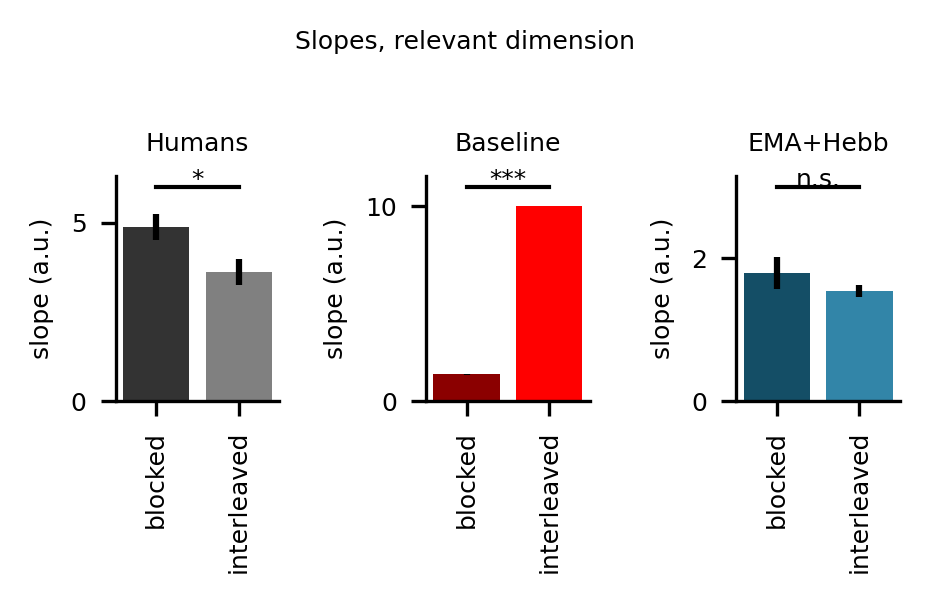

In [51]:
# betas

plt.figure(figsize=(3.2, 2.0), dpi=300)
# make figure
plt.subplot(1, 3, 1)

plt.bar(
    np.arange(2),
    [
        betas["humans"]["blocked"]["rel"][:, 1].mean(),
        betas["humans"]["int"]["rel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["humans"]["blocked"]["rel"][:, 1])
        / np.sqrt(len(betas["humans"]["blocked"]["rel"][:, 1].T)),
        np.std(betas["humans"]["int"]["rel"][:, 1])
        / np.sqrt(len(betas["humans"]["int"]["rel"][:, 1].T)),
    ],
    color=[[0.2, 0.2, 0.2], [0.5, 0.5, 0.5]],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.title("Humans", fontsize=6)
res = ttest_ind(betas["humans"]["blocked"]["rel"][:,1],betas["humans"]["int"]["rel"][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(z)
print(f"betas rel humans blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[6,6],'k-', linewidth=1)
plt.text(0.5,6,sigstar,ha='center',fontsize=6)


plt.subplot(1, 3, 2)
plt.bar(
    np.arange(2),
    [
        betas["baseline"]["blocked"]["rel"][:, 1].mean(),
        betas["baseline"]["int"]["rel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["baseline"]["blocked"]["rel"][:, 1])
        / np.sqrt(len(betas["baseline"]["blocked"]["rel"][:, 1].T)),
        np.std(betas["baseline"]["int"]["rel"][:, 1])
        / np.sqrt(len(betas["baseline"]["int"]["rel"][:, 1].T)),
    ],
    color=['darkred','red'],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.title("Baseline", fontsize=6)
res = ttest_ind(betas["baseline"]["blocked"]["rel"][:,1],betas["baseline"]["int"]["rel"][:,1])
z = res.statistic# norm.isf(res.pvalue/2)
print(f"betas rel baseline blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[11,11],'k-', linewidth=1)
plt.text(0.5,11,sigstar,ha='center',fontsize=6)

plt.subplot(1, 3, 3)
plt.bar(
    np.arange(2),
    [
        betas["ema"]["blocked"]["rel"][:, 1].mean(),
        betas["ema"]["int"]["rel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["ema"]["blocked"]["rel"][:, 1])
        / np.sqrt(len(betas["ema"]["blocked"]["rel"][:, 1].T)),
        np.std(betas["ema"]["int"]["rel"][:, 1])
        / np.sqrt(len(betas["ema"]["int"]["rel"][:, 1].T)),
    ],
    color=[[20/255, 78/255, 102/255],[50/255, 133/255, 168/255]],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()

plt.title("EMA+Hebb", fontsize=6)
res = ttest_ind(betas["ema"]["blocked"]["rel"][:,1],betas["ema"]["int"]["rel"][:,1])
z = res.statistic# norm.isf(res.pvalue/2)
print(f"betas rel ema blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[3,3],'k-', linewidth=1)
plt.text(0.5,3,sigstar,ha='center',fontsize=6)
plt.suptitle('Slopes, relevant dimension',fontsize=6)
plt.tight_layout()


plt.suptitle('Slopes, relevant dimension',fontsize=6)
plt.tight_layout()


betas irrel humans blocked vs interleaved: t=-2.77, p=0.0068
betas irrel baseline blocked vs interleaved: t=56.26, p=0.0000
betas irrel ema blocked vs interleaved: t=-24.14, p=0.0000


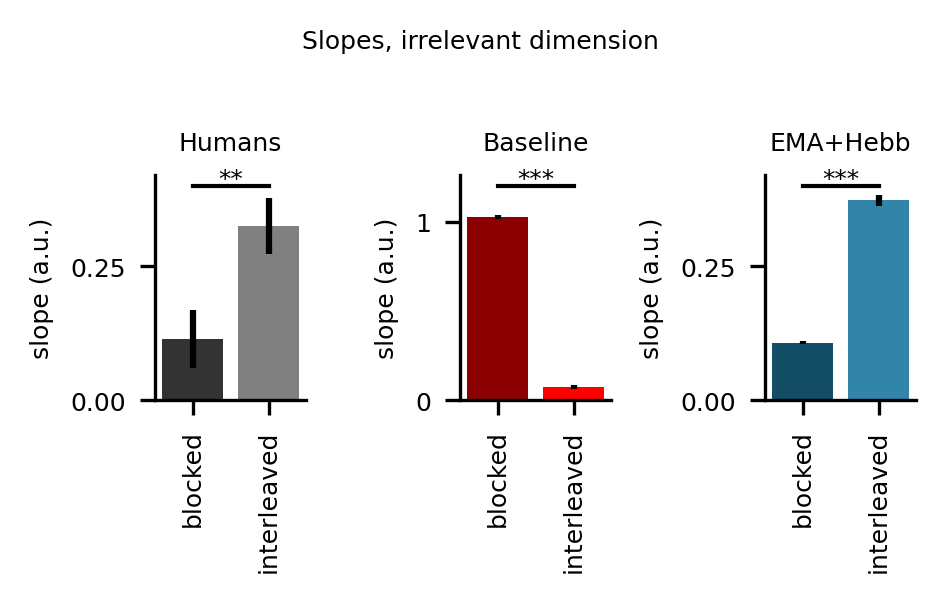

In [52]:

plt.figure(figsize=(3.2, 2.0), dpi=300)
# make figure
plt.subplot(1, 3, 1)

plt.bar(
    np.arange(2),
    [
        betas["humans"]["blocked"]["irrel"][:, 1].mean(),
        betas["humans"]["int"]["irrel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["humans"]["blocked"]["irrel"][:, 1])
        / np.sqrt(len(betas["humans"]["blocked"]["irrel"][:, 1].T)),
        np.std(betas["humans"]["int"]["irrel"][:, 1])
        / np.sqrt(len(betas["humans"]["int"]["irrel"][:, 1].T)),
    ],
    color=[[0.2, 0.2, 0.2], [0.5, 0.5, 0.5]],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.title("Humans", fontsize=6)
res = ttest_ind(betas["humans"]["blocked"]["irrel"][:,1],betas["humans"]["int"]["irrel"][:,1])
z = res.statistic#norm.isf(res.pvalue/2)
print(f"betas irrel humans blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
else: 
    sigstar = '*'*4
plt.plot([0,1],[0.4,0.4],'k-', linewidth=1)
plt.text(0.5,0.4,sigstar,ha='center',fontsize=6)

plt.subplot(1, 3, 2)
plt.bar(
    np.arange(2),
    [
        betas["baseline"]["blocked"]["irrel"][:, 1].mean(),
        betas["baseline"]["int"]["irrel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["baseline"]["blocked"]["irrel"][:, 1])
        / np.sqrt(len(betas["baseline"]["blocked"]["irrel"][:, 1].T)),
        np.std(betas["baseline"]["int"]["irrel"][:, 1])
        / np.sqrt(len(betas["baseline"]["int"]["irrel"][:, 1].T)),
    ],
    color=['darkred','red'],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.title("Baseline", fontsize=6)
res = ttest_ind(betas["baseline"]["blocked"]["irrel"][:,1],betas["baseline"]["int"]["irrel"][:,1])
z = res.statistic#norm.isf(res.pvalue/2)
print(f"betas irrel baseline blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
else: 
    sigstar = '*'*4
plt.plot([0,1],[1.2,1.2],'k-', linewidth=1)
plt.text(0.5,1.2,sigstar,ha='center',fontsize=6)

plt.subplot(1, 3, 3)
plt.bar(
    np.arange(2),
    [
        betas["ema"]["blocked"]["irrel"][:, 1].mean(),
        betas["ema"]["int"]["irrel"][:, 1].mean(),
    ],
    yerr=[
        np.std(betas["ema"]["blocked"]["irrel"][:, 1])
        / np.sqrt(len(betas["ema"]["blocked"]["irrel"][:, 1].T)),
        np.std(betas["ema"]["int"]["irrel"][:, 1])
        / np.sqrt(len(betas["ema"]["int"]["irrel"][:, 1].T)),
    ],
    color=[[20/255, 78/255, 102/255],[50/255, 133/255, 168/255]],
    width=0.8,
)
plt.xticks(ticks=[0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
plt.ylabel("slope (a.u.)", fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.title("EMA+Hebb", fontsize=6)
res = ttest_ind(betas["ema"]["blocked"]["irrel"][:,1],betas["ema"]["int"]["irrel"][:,1])
z = res.statistic#norm.isf(res.pvalue/2)
print(f"betas irrel ema blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
else: 
    sigstar = '*'*4
plt.plot([0,1],[0.4,0.4],'k-', linewidth=1)
plt.text(0.5,0.4,sigstar,ha='center',fontsize=6)

plt.suptitle('Slopes, irrelevant dimension',fontsize=6)
plt.tight_layout()


### Choice Matrices

In [53]:
# human cmats
n_runs = 20
sluggish_vals = np.round(np.linspace(0.05, 1, 20), 2)

# best fitting with baseline_int slug models:
# alpha = 0.25
# idx = np.where(alpha == sluggish_vals)[0][0]
# tempidx_blocked = 13
# tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
# tempidx_interleaved = 16
# tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
# n_runs = 50


# best fitting with oja slug models:
alpha = 0.1
idx = np.where(sluggish_vals==alpha)[0][0]
tempidx_blocked = 14
tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
tempidx_interleaved = 14
tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
n_runs = 20


cmats = loadmat("../datasets/choicemats_exp1a.mat", matlab_compatible=True)
ks = list(cmats.keys())
for k in ks:
    if not "cmat" in k:
        cmats.pop(k)
cmats_human = {
    "int_a": cmats["cmat_i_north"],
    "int_b": cmats["cmat_i_south"],
    "bloc_a": cmats["cmat_b_north"],
    "bloc_b": cmats["cmat_b_south"],
}

# baseline cmats
cmats_baseline = {}
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/baseline_interleaved_new_select/run_" + str(r) + "/results.pkl", "rb"
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_baseline["int_a"] = np.array(cmats_a)
cmats_baseline["int_b"] = np.array(cmats_b)

cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/baseline_blocked_new_select/run_" + str(r) + "/results.pkl", "rb"
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_baseline["bloc_a"] = np.array(cmats_a)
cmats_baseline["bloc_b"] = np.array(cmats_b)


# ema+sla cmats
cmats_emasla = {}
cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/sluggish_oja_int_select_sv"
        + str(idx)
        + "/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_interleaved)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_emasla["int_a"] = np.array(cmats_a)
cmats_emasla["int_b"] = np.array(cmats_b)

cmats_a = []
cmats_b = []
for r in np.arange(0, n_runs):
    with open("../checkpoints/oja_blocked_new_select_halfcenter/run_" + str(r) + "/results.pkl", "rb") as f:
        results = pickle.load(f)
        cc = np.clip(results["all_y_out"][1, :], -709.78, 709.78).astype(np.float64)
        choices = 1 / (1 + np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_blocked)
        cmats_a.append(choices[:25].reshape(5, 5))
        cmats_b.append(choices[25:].reshape(5, 5))

cmats_emasla["bloc_a"] = np.array(cmats_a)
cmats_emasla["bloc_b"] = np.array(cmats_b)


In [54]:
# task factorisation (behav)
betas_human = eval.compute_behav_taskfact(cmats_human)
betas_baseline = eval.compute_behav_taskfact(cmats_baseline)
betas_emasla = eval.compute_behav_taskfact(cmats_emasla)

humans factorised model blocked vs interleaved: t=3.07, p=0.0028
humans linear model blocked vs interleaved: t=-3.12, p=0.0024
humans interaction blocked vs interleaved: t=3.54, p=0.0006
baseline factorised model blocked vs interleaved: t=-74.17, p=0.0000
baseline linear model blocked vs interleaved: t=31.78, p=0.0000
baseline interaction blocked vs interleaved: t=-54.98, p=0.0000
oja factorised model blocked vs interleaved: t=12.82, p=0.0000
oja linear model blocked vs interleaved: t=-23.91, p=0.0000
oja interaction blocked vs interleaved: t=23.43, p=0.0000


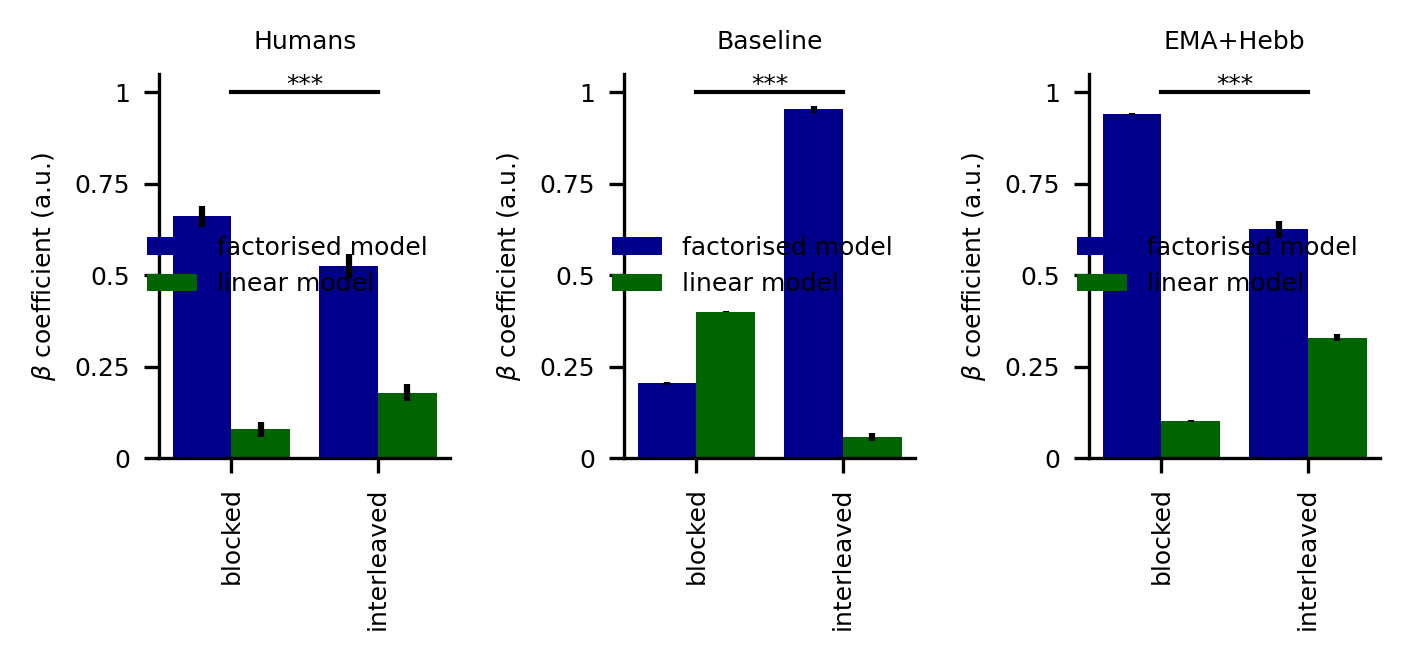

In [55]:
f = plt.figure(figsize=(4.8, 2.3), dpi=300)
plt.subplot(1, 3, 1)
# blocked
ha = plt.bar(
    0 - 0.2,
    np.mean(betas_human["bloc"][:, 0], 0),
    yerr=np.std(betas_human["bloc"][:, 0], 0)
    / np.sqrt(betas_human["bloc"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    0 + 0.2,
    np.mean(betas_human["bloc"][:, 1], 0),
    yerr=np.std(betas_human["bloc"][:, 1], 0)
    / np.sqrt(betas_human["bloc"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)
# interleaved
ha = plt.bar(
    1 - 0.2,
    np.mean(betas_human["int"][:, 0], 0),
    yerr=np.std(betas_human["int"][:, 0], 0)
    / np.sqrt(betas_human["int"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    1 + 0.2,
    np.mean(betas_human["int"][:, 1], 0),
    yerr=np.std(betas_human["int"][:, 1], 0)
    / np.sqrt(betas_human["int"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)
# stats factorised model
res = ttest_ind(betas_human['bloc'][:,0],betas_human['int'][:,0])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"humans factorised model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
# stats linear models
res = ttest_ind(betas_human['bloc'][:,1],betas_human['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"humans linear model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")

# stats interaction (with bars)
res = ttest_ind(betas_human['bloc'][:,0]-betas_human['bloc'][:,1],betas_human['int'][:,0]-betas_human['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"humans interaction blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[1,1],'k-', linewidth=1)
plt.text(0.5,1,sigstar,ha='center',fontsize=6)

sns.despine()
plt.legend([ha, hb], ("factorised model", "linear model"), frameon=False, fontsize=6)
plt.ylabel(r"$\beta$ coefficient (a.u.)", fontsize=6)
# plt.xlabel(r'sluggishness ($1-\alpha$)')
plt.title("Humans", fontsize=6)
plt.xticks([0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
ax = plt.gca()
plt.yticks(ticks = [0,0.25,0.5,0.75,1],labels=[0,0.25,0.5,0.75,1],fontsize=6)

plt.subplot(1, 3, 2)
# blocked
ha = plt.bar(
    0 - 0.2,
    np.mean(betas_baseline["bloc"][:, 0], 0),
    yerr=np.std(betas_baseline["bloc"][:, 0], 0)
    / np.sqrt(betas_baseline["bloc"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    0 + 0.2,
    np.mean(betas_baseline["bloc"][:, 1], 0),
    yerr=np.std(betas_baseline["bloc"][:, 1], 0)
    / np.sqrt(betas_baseline["bloc"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)
# interleaved
ha = plt.bar(
    1 - 0.2,
    np.mean(betas_baseline["int"][:, 0], 0),
    yerr=np.std(betas_baseline["int"][:, 0], 0)
    / np.sqrt(betas_baseline["int"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    1 + 0.2,
    np.mean(betas_baseline["int"][:, 1], 0),
    yerr=np.std(betas_baseline["int"][:, 1], 0)
    / np.sqrt(betas_baseline["int"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)

# stats factorised model
res = ttest_ind(betas_baseline['bloc'][:,0],betas_baseline['int'][:,0])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"baseline factorised model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
# stats linear models
res = ttest_ind(betas_baseline['bloc'][:,1],betas_baseline['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"baseline linear model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")

# stats interaction (with bars)
res = ttest_ind(betas_baseline['bloc'][:,0]-betas_baseline['bloc'][:,1],betas_baseline['int'][:,0]-betas_baseline['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"baseline interaction blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[1,1],'k-', linewidth=1)
plt.text(0.5,1,sigstar,ha='center',fontsize=6)


sns.despine()
plt.legend([ha, hb], ("factorised model", "linear model"), frameon=False, fontsize=6)
plt.ylabel(r"$\beta$ coefficient (a.u.)", fontsize=6)
# plt.xlabel(r'sluggishness ($1-\alpha$)')
plt.title("Baseline", fontsize=6)
plt.xticks([0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
ax = plt.gca()
plt.yticks(ticks = [0,0.25,0.5,0.75,1],labels=[0,0.25,0.5,0.75,1],fontsize=6)

plt.subplot(1, 3, 3)
# blocked
ha = plt.bar(
    0 - 0.2,
    np.mean(betas_emasla["bloc"][:, 0], 0),
    yerr=np.std(betas_emasla["bloc"][:, 0], 0)
    / np.sqrt(betas_emasla["bloc"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    0 + 0.2,
    np.mean(betas_emasla["bloc"][:, 1], 0),
    yerr=np.std(betas_emasla["bloc"][:, 1], 0)
    / np.sqrt(betas_emasla["bloc"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)
# interleaved
ha = plt.bar(
    1 - 0.2,
    np.mean(betas_emasla["int"][:, 0], 0),
    yerr=np.std(betas_emasla["int"][:, 0], 0)
    / np.sqrt(betas_emasla["int"][:, 0].shape[0]),
    width=0.4,
    color="darkblue",
)
hb = plt.bar(
    1 + 0.2,
    np.mean(betas_emasla["int"][:, 1], 0),
    yerr=np.std(betas_emasla["int"][:, 1], 0)
    / np.sqrt(betas_emasla["int"][:, 1].shape[0]),
    width=0.4,
    color="darkgreen",
)
sns.despine()
# stats factorised model
res = ttest_ind(betas_emasla['bloc'][:,0],betas_emasla['int'][:,0])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"oja factorised model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
# stats linear models
res = ttest_ind(betas_emasla['bloc'][:,1],betas_emasla['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"oja linear model blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")

# stats interaction (with bars)
res = ttest_ind(betas_emasla['bloc'][:,0]-betas_emasla['bloc'][:,1],betas_emasla['int'][:,0]-betas_emasla['int'][:,1])
z = res.statistic # norm.isf(res.pvalue/2)
print(f"oja interaction blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'

plt.plot([0,1],[1,1],'k-', linewidth=1)
plt.text(0.5,1,sigstar,ha='center',fontsize=6)

plt.legend([ha, hb], ("factorised model", "linear model"), frameon=False, fontsize=6)
plt.ylabel(r"$\beta$ coefficient (a.u.)", fontsize=6)
# plt.xlabel(r'sluggishness ($1-\alpha$)')
plt.title("EMA+Hebb", fontsize=6)
plt.xticks([0, 1], labels=["blocked", "interleaved"], rotation=90, fontsize=6)
ax = plt.gca()
plt.yticks(ticks = [0,0.25,0.5,0.75,1],labels=[0,0.25,0.5,0.75,1],fontsize=6)


plt.tight_layout()


### Psychophysical Model

In [ ]:
# psychophys model 
# best fitting with baseline_int slug models:
# alpha = 0.25
# idx = np.where(alpha == sluggish_vals)[0][0]
# tempidx_blocked = 13
# tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
# tempidx_interleaved = 16
# tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
# n_runs = 20


# best fitting with oja slug models:
alpha = 0.1
idx = np.where(sluggish_vals==alpha)[0][0]
tempidx_blocked = 14
tempval_blocked = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_blocked]
tempidx_interleaved = 14
tempval_interleaved = np.logspace(np.log(0.1), np.log(4), 20)[tempidx_interleaved]
n_runs = 20

cmats = loadmat('../datasets/choicemats_exp1a.mat')
cmats.keys()
choicemats_humans = {
    'blocked': 
    {
        'task_a':cmats['cmat_b_south'], 
        'task_b':cmats['cmat_b_north']
    },
    'interleaved': 
    {
        'task_a':cmats['cmat_i_south'], 
        'task_b':cmats['cmat_i_north']
    }
}


choicemats_baseline = {
    'blocked': 
    {
        'task_a':[], 
        'task_b':[]
    },
    'interleaved': 
    {
        'task_a':[], 
        'task_b':[]
    }
}


choicemats_sla = {
    'blocked': 
    {
        'task_a':[], 
        'task_b':[]
    },
    'interleaved': 
    {
        'task_a':[], 
        'task_b':[]
    }
}

## baseline --------------------------------
n_runs = 20 

cmats_a = []
cmats_b = []
for r in np.arange(0,n_runs):
    with open('../checkpoints/baseline_blocked_new_select/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        cc = np.clip(results['all_y_out'][1,:], -709.78, 709.78).astype(np.float64)
        choices = 1/(1+np.exp(-cc))
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
        
choicemats_baseline['blocked']['task_b'] = np.array(cmats_a)
choicemats_baseline['blocked']['task_a'] = np.array(cmats_b)

cmats_a = []
cmats_b = []
for r in np.arange(0,n_runs):
    with open('../checkpoints/baseline_interleaved_new_select/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        cc = np.clip(results['all_y_out'][1,:], -709.78, 709.78).astype(np.float64)
        choices = 1/(1+np.exp(-cc))
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
        
choicemats_baseline['interleaved']['task_b'] = np.array(cmats_a)
choicemats_baseline['interleaved']['task_a'] = np.array(cmats_b)

## oja ------------------------------------------
sluggish_vals = np.round(np.linspace(0.05,1,20),2)
# alpha = 0.2
# idx = np.where(alpha==sluggish_vals)[0][0]
cmats_a = []
cmats_b = []
for r in np.arange(0,n_runs):
    with open('../checkpoints/oja_blocked_new_select_halfcenter/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        cc = np.clip(results['all_y_out'][1,:], -709.78, 709.78).astype(np.float64)
        choices = 1/(1+np.exp(-cc))
        choices = choicemodel.choicemodel.choice_sigmoid(cc,T=tempval_blocked)
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
        
choicemats_sla['blocked']['task_b'] = np.array(cmats_a)
choicemats_sla['blocked']['task_a'] = np.array(cmats_b)

cmats_a = []
cmats_b = []
for r in np.arange(0,n_runs):
    with open('../checkpoints/sluggish_oja_int_select_sv'+ str(idx) +'/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
        cc = np.clip(results['all_y_out'][1,:], -709.78, 709.78).astype(np.float64)
        choices = 1/(1+np.exp(-cc))
        choices = choicemodel.choice_sigmoid(cc,T=tempval_interleaved)
        cmats_a.append(choices[:25].reshape(5,5))
        cmats_b.append(choices[25:].reshape(5,5))
        
choicemats_sla['interleaved']['task_b'] = np.array(cmats_a)
choicemats_sla['interleaved']['task_a'] = np.array(cmats_b)



thetas_humans = {}
for cur in ['blocked','interleaved']:
    thetas_humans[cur] = choicemodel.fit_model_to_subjects(choicemats_humans[cur],n_runs=1)

thetas_baseline = {}
for cur in ['blocked','interleaved']:
    thetas_baseline[cur] = choicemodel.fit_model_to_subjects(choicemats_baseline[cur],n_runs=1)

thetas_oja = {}
for cur in ['blocked','interleaved']:
    thetas_oja[cur] = choicemodel.fit_model_to_subjects(choicemats_sla[cur],n_runs=1)


all_thetas = {
    'humans':thetas_humans,
    'baseline':thetas_baseline,
    'emahebb':thetas_oja
}

# with open('../results/thetas_est.pkl','rb') as f:
#     all_thetas = pickle.load(f)

# all_thetas['emahebb'] = thetas_oja
with open('../results/thetas_est.pkl','wb') as f:
    pickle.dump(all_thetas, f)

TypeError: helper_ttest() missing 1 required positional argument: 'param'

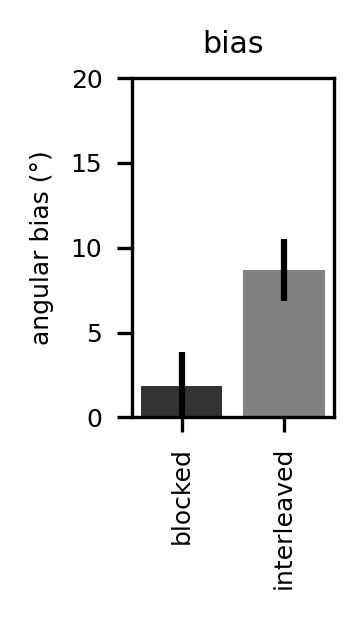

In [57]:
with open('../results/thetas_est.pkl','rb') as f:
    all_thetas = pickle.load(f)
plotting.disp_model_estimates(all_thetas['humans'], cols=([0.2, 0.2, 0.2], [0.5, 0.5, 0.5]))
plotting.disp_model_estimates(all_thetas['baseline'], cols=["darkred", "red"])
plotting.disp_model_estimates(all_thetas['emahebb'], cols=[[20/255, 78/255, 102/255],[50/255, 133/255, 168/255]])


### Congruency Effect

In [ ]:
_,_,cmats = eval.gen_behav_models()
cmat_a = cmats[0,0,:,:]
cmat_b = cmats[0,1,:,:]
# human
acc_congr_human = {}
curricula = ('bloc','int')
for c in curricula:
    acc_congr_human[c] = []
    for ii in range(len(cmats_human[c+'_a'])):
        c_a = cmats_human[c+'_a'][ii,:,:]
        c_b = cmats_human[c+'_b'][ii,:,:]
        # compute congruency effect:
        accc_a,acci_a = eval.compute_congruency_acc(c_a,cmat_a)
        accc_b,acci_b = eval.compute_congruency_acc(c_b,cmat_b)
        acc_congr_human[c].append([(accc_a+accc_b)/2 - (acci_a+acci_b)/2])
    acc_congr_human[c] = np.asarray(acc_congr_human[c])

# baseline 
acc_congr_baseline = {}
curricula = ('bloc','int')
for c in curricula:
    acc_congr_baseline[c] = []
    for ii in range(len(cmats_baseline[c+'_a'])):
        c_a = cmats_baseline[c+'_a'][ii,:,:]
        c_b = cmats_baseline[c+'_b'][ii,:,:]
        # compute congruency effect:
        accc_a,acci_a = eval.compute_congruency_acc(c_a,cmat_a)
        accc_b,acci_b = eval.compute_congruency_acc(c_b,cmat_b)
        acc_congr_baseline[c].append([(accc_a+accc_b)/2 - (acci_a+acci_b)/2])
    acc_congr_baseline[c] = np.asarray(acc_congr_baseline[c])

# ema+sla
acc_congr_emasla = {}
curricula = ('bloc','int')
for c in curricula:
    acc_congr_emasla[c] = []
    for ii in range(len(cmats_emasla[c+'_a'])):
        c_a = cmats_emasla[c+'_a'][ii,:,:]
        c_b = cmats_emasla[c+'_b'][ii,:,:]
        # compute congruency effect:
        accc_a,acci_a = eval.compute_congruency_acc(c_a,cmat_a)
        accc_b,acci_b = eval.compute_congruency_acc(c_b,cmat_b)
        acc_congr_emasla[c].append([(accc_a+accc_b)/2 - (acci_a+acci_b)/2])
    acc_congr_emasla[c] = np.asarray(acc_congr_emasla[c])

In [ ]:
plt.figure(figsize=(3.2,2.0),dpi=300)
# make figure 
plt.subplot(1,3,1)
accs = loadmat('../../data/pnas_paper/accs_exp1a.mat')
plt.bar(np.arange(2),[acc_congr_human['bloc'].mean(),acc_congr_human['int'].mean()],yerr=[np.std(acc_congr_human['bloc'])/np.sqrt(len(acc_congr_human['bloc'])),np.std(acc_congr_human['int'])/np.sqrt(len(acc_congr_human['int']))],color=[[0.2,0.2,0.2],[0.5,0.5,0.5]],width=0.8)
plt.xticks(ticks=[0,1],labels=['blocked','interleaved'],rotation=90,fontsize=6)
plt.ylim((0,0.5))
plt.yticks(ticks=plt.yticks()[0],labels=(int(x) for x in plt.yticks()[0]*100),fontsize=6)
plt.ylabel('accuracy difference (%)',fontsize=6)
sns.despine()
plt.title('Humans',fontsize=6)
res = ttest_ind(acc_congr_human['bloc'].ravel(), acc_congr_human['int'].ravel())
z = res.statistic#norm.isf(res.pvalue / 2)
print(f"humans, congruency blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar = "n.s."
elif res.pvalue < 0.001:
    sigstar = "*" * 3
elif res.pvalue < 0.01:
    sigstar = "*" * 2
elif res.pvalue < 0.05:
    sigstar = "*"
plt.plot([0, 1], [0.5, 0.5], "k-", linewidth=1)
plt.text(0.5, 0.5, sigstar, ha="center", fontsize=6)



plt.subplot(1,3,2)
plt.bar(np.arange(2),[acc_congr_baseline['bloc'].mean(),acc_congr_baseline['int'].mean()],yerr=[np.std(acc_congr_baseline['bloc'])/np.sqrt(len(acc_congr_baseline['bloc'])),np.std(acc_congr_baseline['int'])/np.sqrt(len(acc_congr_baseline['int']))],color=['darkred','red'],width=0.8)
plt.xticks(ticks=[0,1],labels=['blocked','interleaved'],rotation=90,fontsize=6)
plt.yticks(ticks=plt.yticks()[0],labels=(int(x) for x in plt.yticks()[0]*100),fontsize=6)
plt.ylabel('accuracy difference (%)',fontsize=6)
plt.ylim((0,0.5))
sns.despine()
plt.title('Baseline',fontsize=6)
res = ttest_ind(acc_congr_baseline['bloc'].ravel(), acc_congr_baseline['int'].ravel())
z = res.statistic#norm.isf(res.pvalue / 2)
print(f"baselines, congruency blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar = "n.s."
elif res.pvalue < 0.001:
    sigstar = "*" * 3
elif res.pvalue < 0.01:
    sigstar = "*" * 2
elif res.pvalue < 0.05:
    sigstar = "*"
plt.plot([0, 1], [0.5, 0.5], "k-", linewidth=1)
plt.text(0.5, 0.5, sigstar, ha="center", fontsize=6)



plt.subplot(1,3,3)
plt.bar(np.arange(2),[acc_congr_emasla['bloc'].mean(),acc_congr_emasla['int'].mean()],yerr=[np.std(acc_congr_emasla['bloc'])/np.sqrt(len(acc_congr_emasla['bloc'])),np.std(acc_congr_emasla['int'])/np.sqrt(len(acc_congr_emasla['int']))],color=[[20/255, 78/255, 102/255],[0.5/255, 133/255, 168/255]],width=0.8)
plt.xticks(ticks=[0,1],labels=['blocked','interleaved'],rotation=90,fontsize=6)
plt.ylim((0,0.5))
plt.yticks(ticks=plt.yticks()[0],labels=(int(x) for x in plt.yticks()[0]*100),fontsize=6)
plt.ylabel('accuracy difference (%)',fontsize=6)
sns.despine()
plt.title('EMA+Hebb',fontsize=6)
res = ttest_ind(acc_congr_emasla['bloc'].ravel(), acc_congr_emasla['int'].ravel())
z = res.statistic#norm.isf(res.pvalue / 2)
print(f"oja, congruency blocked vs interleaved: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar = "n.s."
elif res.pvalue < 0.001:
    sigstar = "*" * 3
elif res.pvalue < 0.01:
    sigstar = "*" * 2
elif res.pvalue < 0.05:
    sigstar = "*"
plt.plot([0, 1], [0.5, 0.5], "k-", linewidth=1)
plt.text(0.5, 0.5, sigstar, ha="center", fontsize=6)


plt.suptitle('Congruency Effect',fontsize=6)
plt.tight_layout()

## Figure 6: Neural predictions

### Hidden Layer RSA
Fit grid, orthogonal and diagonal model to data.  
Prediction: Orthogonal best in blocked, diagonal best in interleaved group

In [ ]:
n_runs = 20
sluggish_vals = np.round(np.linspace(0.05,1,20),2)
alpha = 0.05
idx = np.where(alpha==sluggish_vals)[0][0]

betas_blocked = []
betas_int = []
rdms, dmat = eval.gen_modelrdms(ctx_offset=1)


for r in np.arange(0,n_runs):
    with open('../checkpoints/oja_blocked_new_select_halfcenter/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
    y = zscore(squareform(pdist(results['all_y_hidden'][1,:,:]))[np.tril_indices(50, k=-1)]).flatten()
    lr = LinearRegression()
    lr.fit(dmat,y)
    betas_blocked.append(lr.coef_)
betas_blocked = np.asarray(betas_blocked)


for r in np.arange(0,n_runs):
    with open('../checkpoints/sluggish_oja_int_select_sv'+ str(idx) +'/run_' + str(r) +'/results.pkl','rb') as f:
        results = pickle.load(f)
    y = zscore(squareform(pdist(results['all_y_hidden'][1,:,:]))[np.tril_indices(50, k=-1)]).flatten()
    lr = LinearRegression()
    lr.fit(dmat,y)
    betas_int.append(lr.coef_)
betas_int = np.asarray(betas_int)

In [ ]:
%matplotlib inline
f, axs = plt.subplots(1,1,figsize=(2,2), dpi = 300)

b1 = axs.bar(0-0.2,betas_blocked[:,0].mean(0),yerr=np.std(betas_blocked[:,0],0)/np.sqrt(n_runs),color=(39/255, 140/255, 145/255),width=0.2)
b2 = axs.bar(0,betas_blocked[:,1].mean(0),yerr=np.std(betas_blocked[:,1],0)/np.sqrt(n_runs),color=(34/255, 76/255, 128/255),width=0.2)
b3 = axs.bar(0+0.2,betas_blocked[:,2].mean(0),yerr=np.std(betas_blocked[:,2],0)/np.sqrt(n_runs),color=(159/255, 45/255, 235/255),width=0.2)

b1 = axs.bar(1-0.2,betas_int[:,0].mean(0),yerr=np.std(betas_int[:,0],0)/np.sqrt(n_runs),color=(39/255, 140/255, 145/255),width=0.2)
b2 = axs.bar(1,betas_int[:,1].mean(0),yerr=np.std(betas_int[:,1],0)/np.sqrt(n_runs),color=(34/255, 76/255, 128/255),width=0.2)
b3 = axs.bar(1+0.2,betas_int[:,2].mean(0),yerr=np.std(betas_int[:,2],0)/np.sqrt(n_runs),color=(159/255, 45/255, 235/255),width=0.2)
axs.set_xticks((0,1))
axs.set_yticks((0,0.25,0.5,0.75,1))
axs.set_xticklabels(('blocked','interleaved'),rotation=0,fontsize=6)
axs.set_yticklabels([0,0.25,0.5,0.75,1],fontsize=6)
axs.set_title('Model RSA, Hidden Layer',fontsize=6)
axs.set_ylabel(r'$\beta$ estimate (a.u.)',fontsize=6)
axs.legend([b1,b2,b3],['grid','orthogonal','diagonal'],fontsize=6,frameon=False)

res = ttest_ind(betas_blocked[:,0].ravel(),betas_blocked[:,1].ravel())
z = res.statistic
print(f"blocked grid vs orth: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([-0.2,0],[0.75,0.75],'k-', linewidth=1)
plt.text(-0.1,0.75,sigstar,ha='center',fontsize=6)

res = ttest_ind(betas_blocked[:,1].ravel(),betas_blocked[:,2].ravel())
z = res.statistic
print(f"blocked orth vs diag: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([0, 0.2],[0.7,0.7],'k-', linewidth=1)
plt.text(0.1,0.7,sigstar,ha='center',fontsize=6)

res = ttest_ind(betas_int[:,0].ravel(),betas_int[:,2].ravel())
z = res.statistic
print(f"int grid vs diag: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([0.8,1.2],[0.94,0.94],'k-', linewidth=1)
plt.text(1,0.94,sigstar,ha='center',fontsize=6)

res = ttest_ind(betas_int[:,1].ravel(),betas_int[:,2].ravel())
z = res.statistic
print(f"int orth vs diag: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([1,1.2],[0.88,0.88],'k-', linewidth=1)
plt.text(1.1,0.88,sigstar,ha='center',fontsize=6)


sns.despine()
plt.tight_layout()

### Task Selectivity (%)

In [ ]:
blocked_n_only_a = []
blocked_n_only_b = []
blocked_n_mixed = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/oja_blocked_new_select/run_" + str(r) + "/results.pkl", "rb"
    ) as f:
        results = pickle.load(f)
    blocked_n_only_a.append(results["n_only_a_regr"][-1])
    blocked_n_only_b.append(results["n_only_b_regr"][-1])
    blocked_n_mixed.append(100 - blocked_n_only_a[-1] - blocked_n_only_b[-1])

blocked_n_only_a = np.asarray(blocked_n_only_a)
blocked_n_only_b = np.asarray(blocked_n_only_b)
blocked_n_mixed = np.asarray(blocked_n_mixed)
print(f"blocked, task-specific: {blocked_n_only_a.mean()+blocked_n_only_b.mean()}")
print(f"blocked, task-agnostic: {blocked_n_mixed.mean()}")
int_n_only_a = []
int_n_only_b = []
int_n_mixed = []
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/sluggish_oja_int_select_sv"
        + str(idx)
        + "/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)
    int_n_only_a.append(results["n_only_a_regr"][-1])
    int_n_only_b.append(results["n_only_b_regr"][-1])
    int_n_mixed.append(100 - int_n_only_a[-1] - int_n_only_b[-1])

int_n_only_a = np.asarray(int_n_only_a)
int_n_only_b = np.asarray(int_n_only_b)
int_n_mixed = np.asarray(int_n_mixed)
print(f"int, task-specific: {int_n_only_a.mean()+int_n_only_b.mean()}")
print(f"int, task-agnostic: {int_n_mixed.mean()}")
n_a = np.stack((blocked_n_only_a, int_n_only_a), axis=1)
n_b = np.stack((blocked_n_only_b, int_n_only_b), axis=1)
n_m = np.stack((blocked_n_mixed, int_n_mixed), axis=1)
f, ax = plt.subplots(figsize=(2, 2), dpi=300)
b1 = ax.bar(
    ["blocked", "interleaved"],
    n_a.mean(0),
    yerr=np.std(n_a, 0, ddof=1) / np.sqrt(n_runs),
    width=0.2,
)
b2 = ax.bar(
    ["blocked", "interleaved"],
    n_b.mean(0),
    yerr=np.std(n_a, 0, ddof=1) / np.sqrt(n_runs),
    bottom=n_a.mean(0),
    width=0.2,
)
b3 = ax.bar(
    ["blocked", "interleaved"],
    n_m.mean(0),
    yerr=np.std(n_a, 0, ddof=1) / np.sqrt(n_runs),
    bottom=n_b.mean(0) + n_a.mean(0),
    width=0.2,
)
ax.set_ylabel("hidden units (%)", fontsize=6)
ax.legend(
    [b1, b2, b3],
    ["1st task, rel. dim.", "2nd task, rel. dim.", "task agnostic"],
    fontsize=6,
    frameon=False,
)
ax.set_title("Hidden Unit Selectivity", fontsize=6)
sns.despine()

for item in (
    [ax.title, ax.xaxis.label, ax.yaxis.label]
    + ax.get_xticklabels()
    + ax.get_yticklabels()
    + ax.get_legend().get_texts()
):
    item.set_fontsize(6)


### Readout Magnitude

In [ ]:
import torch
from utils.eval import make_dmat

n_runs = 20
sluggish_vals = np.round(np.linspace(0.05,1,20),2)
alpha = 0.05
idx = np.where(alpha==sluggish_vals)[0][0]
data = eval.make_blobs_dataset()

dmat = make_dmat(data['f_all'])

readout_magnitude = np.empty((50,3))
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/sluggish_oja_int_select_sv"
        + str(idx)
        + "/run_"
        + str(r)
        + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)

    yh = results['all_y_hidden'][1,:,:]
    selectivity_matrix = np.zeros((100, 6))
    for i_neuron in range(100):
        y_neuron = yh[:, i_neuron]
        lr = sm.OLS(zscore(y_neuron), dmat)
        regr_results = lr.fit()
        # if only a single regressor is significant, store that neuron's selectivity
        if np.sum(regr_results.tvalues > 1.96) == 1:
            selectivity_matrix[
                i_neuron,
                np.where(regr_results.tvalues == np.max(regr_results.tvalues))[0][
                    0
                ],
            ] = 1
    i_task_a = (
        (selectivity_matrix[:, 0] == 0)
        & (selectivity_matrix[:, 1] == 1)
        & (selectivity_matrix[:, 2] == 0)
        & (selectivity_matrix[:, 3] == 0)
    )
    i_task_b = (
        (selectivity_matrix[:, 0] == 0)
        & (selectivity_matrix[:, 1] == 0)
        & (selectivity_matrix[:, 2] == 1)
        & (selectivity_matrix[:, 3] == 0)
    )

    with open(
            "../checkpoints/sluggish_oja_int_select_sv"
            + str(idx)
            + "/run_"
            + str(r)
            + "/model.pkl",
            "rb",
        ) as f:
            model = pickle.load(f)
    wo = model.W_o.cpu().detach().numpy()
    
    readout_magnitude[r,0] = np.abs(wo[i_task_a]).mean() if sum(i_task_a) !=0 else 0
    readout_magnitude[r,1] = np.abs(wo[i_task_b]).mean() if sum(i_task_b) !=0 else 0
    readout_magnitude[r,2] = np.abs(wo[~((i_task_a==True) | (i_task_b==True))]).mean()
readout_magnitude_int = readout_magnitude


In [ ]:
import sys
sys.path.append(r'../hebbcl/')


with open(
    "../checkpoints/oja_blocked_new_select/run_" + str(r) + "/results.pkl", "rb"
) as f:
    results = pickle.load(f)


import torch
from utils.eval import make_dmat


data = eval.make_blobs_dataset()

dmat = make_dmat(data["f_all"])

readout_magnitude = np.empty((50, 3))
for r in np.arange(0, n_runs):
    with open(
        "../checkpoints/oja_blocked_new_select_halfcenter/run_" + str(r) + "/results.pkl",
        "rb",
    ) as f:
        results = pickle.load(f)

    yh = results["all_y_hidden"][1, :, :]
    selectivity_matrix = np.zeros((100, 6))
    for i_neuron in range(100):
        y_neuron = yh[:, i_neuron]
        lr = sm.OLS(zscore(y_neuron), dmat)
        regr_results = lr.fit()
        # if only a single regressor is significant, store that neuron's selectivity
        if np.sum(regr_results.tvalues > 1.96) == 1:
            selectivity_matrix[
                i_neuron,
                np.where(regr_results.tvalues == np.max(regr_results.tvalues))[0][0],
            ] = 1
    i_task_a = (
        (selectivity_matrix[:, 0] == 0)
        & (selectivity_matrix[:, 1] == 1)
        & (selectivity_matrix[:, 2] == 0)
        & (selectivity_matrix[:, 3] == 0)
    )
    i_task_b = (
        (selectivity_matrix[:, 0] == 0)
        & (selectivity_matrix[:, 1] == 0)
        & (selectivity_matrix[:, 2] == 1)
        & (selectivity_matrix[:, 3] == 0)
    )

    with open("../checkpoints/oja_blocked_new_select_halfcenter/run_" + str(r) + "/model.pkl", "rb") as f:
        model = pickle.load(f)
    
    wo = model.W_o.cpu().detach().numpy()

    readout_magnitude[r, 0] = np.abs(wo[i_task_a]).mean() if sum(i_task_a) != 0 else 0
    readout_magnitude[r, 1] = np.abs(wo[i_task_b]).mean() if sum(i_task_b) != 0 else 0
    readout_magnitude[r, 2] = np.abs(
        wo[~((i_task_a == True) | (i_task_b == True))]
    ).mean()

readout_magnitude_blocked = readout_magnitude


In [ ]:
f, axs = plt.subplots(1,1,figsize=(2,2), dpi = 300)

b1 = axs.bar(0-0.2,readout_magnitude_blocked[:,0].mean(0),yerr=np.std(readout_magnitude_blocked[:,0],0)/np.sqrt(50),color=(39/255, 140/255, 145/255),width=0.2)
b2 = axs.bar(0,readout_magnitude_blocked[:,1].mean(0),yerr=np.std(readout_magnitude_blocked[:,1],0)/np.sqrt(50),color=(34/255, 76/255, 128/255),width=0.2)
b3 = axs.bar(0+0.2,readout_magnitude_blocked[:,2].mean(0),yerr=np.std(readout_magnitude_blocked[:,2],0)/np.sqrt(50),color=(159/255, 45/255, 235/255),width=0.2)

b1 = axs.bar(1-0.2,readout_magnitude_int[:,0].mean(0),yerr=np.std(readout_magnitude_int[:,0],0)/np.sqrt(20),color=(39/255, 140/255, 145/255),width=0.2)
b2 = axs.bar(1,readout_magnitude_int[:,1].mean(0),yerr=np.std(readout_magnitude_int[:,1],0)/np.sqrt(20),color=(34/255, 76/255, 128/255),width=0.2)
b3 = axs.bar(1+0.2,readout_magnitude_int[:,2].mean(0),yerr=np.std(readout_magnitude_int[:,2],0)/np.sqrt(20),color=(159/255, 45/255, 235/255),width=0.2)
axs.set_xticks((0,1))
axs.set_xticklabels(('blocked','interleaved'),rotation=0,fontsize=6)
# ticks = np.round(axs.get_yticks(),2)
# axs.set_yticklabels(ticks,fontsize=6)
plt.yticks(fontsize=6)
axs.set_title('Readout Weights',fontsize=6)
axs.set_ylabel(r'weight magnitude (a.u.)',fontsize=6)
axs.legend([b1,b2,b3],['1st task','2nd task','task agnostic'],fontsize=6,frameon=False)

res = ttest_ind(readout_magnitude_int[:,0].ravel(),readout_magnitude_int[:,2].ravel())
z = res.statistic
print(f"int 1st vs agnostic: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([0.8,1.2],[0.22,0.22],'k-', linewidth=1)
plt.text(1,0.22,sigstar,ha='center',fontsize=6)

res = ttest_ind(readout_magnitude_int[:,1].ravel(),readout_magnitude_int[:,2].ravel())
z = res.statistic
print(f"int 2nd vs agnostic: t={z:.2f}, p={res.pvalue:.4f}")
if res.pvalue >= 0.05:
    sigstar ='n.s.'
elif res.pvalue < 0.001:
    sigstar ='*'*3
elif res.pvalue < 0.01:
    sigstar ='*'*2
elif res.pvalue <0.05:
    sigstar ='*'
plt.plot([1,1.2],[0.19,0.19],'k-', linewidth=1)
plt.text(1.1,0.19,sigstar,ha='center',fontsize=6)
sns.despine()
plt.tight_layout()